In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2
np.random.seed(12345)
%matplotlib widget

In [2]:
# Import data
path1 = raw_data_path + '/Imaging/mng/210804_nwg378_tom4,5,60,500'
path2 = raw_data_path + '/Imaging/mng/220826_nwg378_tom4,5,60,500'
paths = direcslist(path1) + direcslist(path2)
print(len(paths))
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

17


In [3]:
# Run calibration
iq = ImageQuant2(img=imgs, roi=rois)
iq.calibrate_cytoplasm()

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<09:26,  1.06it/s]

  2%|██▉                                                                                                                                             | 12/600 [00:01<00:38, 15.24it/s]

  4%|█████▌                                                                                                                                          | 23/600 [00:01<00:19, 30.07it/s]

  6%|████████▏                                                                                                                                       | 34/600 [00:01<00:12, 44.27it/s]

  7%|██████████▌                                                                                                                                     | 44/600 [00:01<00:10, 55.25it/s]

  9%|█████████████▏                                                                                                                                  | 55/600 [00:01<00:08, 67.31it/s]

 11%|████████████████                                                                                                                                | 67/600 [00:01<00:06, 79.47it/s]

 13%|███████████████████▏                                                                                                                            | 80/600 [00:01<00:05, 92.24it/s]

 16%|██████████████████████▏                                                                                                                        | 93/600 [00:01<00:04, 102.14it/s]

 18%|█████████████████████████▎                                                                                                                    | 107/600 [00:01<00:04, 110.71it/s]

 20%|████████████████████████████▍                                                                                                                 | 120/600 [00:01<00:04, 112.08it/s]

 22%|███████████████████████████████▍                                                                                                               | 132/600 [00:02<00:04, 98.81it/s]

 24%|█████████████████████████████████▊                                                                                                            | 143/600 [00:02<00:04, 101.05it/s]

 26%|████████████████████████████████████▋                                                                                                         | 155/600 [00:02<00:04, 103.77it/s]

 28%|███████████████████████████████████████▌                                                                                                       | 166/600 [00:02<00:04, 99.35it/s]

 30%|██████████████████████████████████████████▏                                                                                                    | 177/600 [00:02<00:04, 98.18it/s]

 31%|████████████████████████████████████████████▊                                                                                                  | 188/600 [00:02<00:04, 98.46it/s]

 33%|███████████████████████████████████████████████                                                                                               | 199/600 [00:02<00:03, 101.35it/s]

 35%|██████████████████████████████████████████████████▏                                                                                           | 212/600 [00:02<00:03, 107.54it/s]

 38%|█████████████████████████████████████████████████████▎                                                                                        | 225/600 [00:03<00:03, 112.69it/s]

 40%|████████████████████████████████████████████████████████                                                                                      | 237/600 [00:03<00:03, 111.31it/s]

 42%|███████████████████████████████████████████████████████████▎                                                                                   | 249/600 [00:03<00:03, 99.86it/s]

 43%|█████████████████████████████████████████████████████████████▉                                                                                 | 260/600 [00:03<00:03, 94.25it/s]

 45%|████████████████████████████████████████████████████████████████▎                                                                              | 270/600 [00:03<00:03, 93.41it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                            | 280/600 [00:03<00:03, 89.24it/s]

 48%|█████████████████████████████████████████████████████████████████████                                                                          | 290/600 [00:03<00:03, 89.02it/s]

 50%|███████████████████████████████████████████████████████████████████████▎                                                                       | 299/600 [00:03<00:04, 73.07it/s]

 51%|█████████████████████████████████████████████████████████████████████████▍                                                                     | 308/600 [00:04<00:03, 76.36it/s]

 53%|████████████████████████████████████████████████████████████████████████████▎                                                                  | 320/600 [00:04<00:03, 86.43it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▋                                                                | 330/600 [00:04<00:03, 89.90it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▍                                                            | 344/600 [00:04<00:02, 102.09it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▋                                                         | 358/600 [00:04<00:02, 111.54it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▊                                                      | 371/600 [00:04<00:01, 115.73it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 383/600 [00:04<00:01, 114.70it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 396/600 [00:04<00:01, 117.33it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 409/600 [00:04<00:01, 120.83it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 422/600 [00:04<00:01, 122.20it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 435/600 [00:05<00:01, 120.65it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 448/600 [00:05<00:01, 110.67it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 460/600 [00:05<00:01, 104.08it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 471/600 [00:05<00:01, 99.55it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 482/600 [00:05<00:01, 90.88it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 492/600 [00:05<00:01, 87.82it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 501/600 [00:05<00:01, 86.65it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 512/600 [00:05<00:00, 91.89it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 524/600 [00:06<00:00, 98.50it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 537/600 [00:06<00:00, 105.48it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 549/600 [00:06<00:00, 109.45it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 561/600 [00:06<00:00, 99.29it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 573/600 [00:06<00:00, 103.36it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 585/600 [00:06<00:00, 105.20it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 596/600 [00:06<00:00, 105.75it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 88.50it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

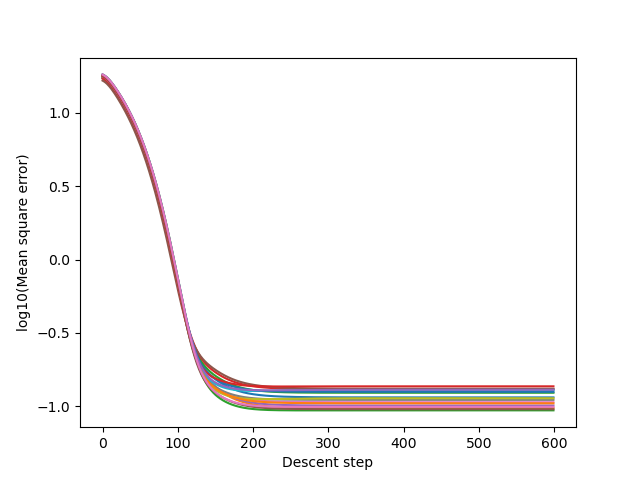

In [4]:
# Plot losses
iq.plot_losses(log=True)

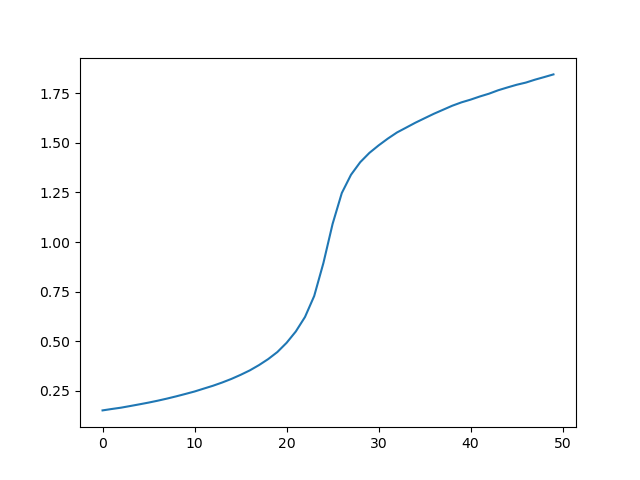

In [5]:
# Plot calibrated cytoplasmic profile
fig, ax = plt.subplots()
ax.plot(iq.cytbg)

In [6]:
# Save
np.savetxt('../../data/calibration_cyt.txt', iq.cytbg)